In [3]:
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library("randomForestSRC")
library("ggpmisc")
library(patchwork)
library("speedyseq")
library(microViz)

Loading required package: phyloseq


microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2022 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ microbiome::alpha() masks ggplot2::alpha()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

 randomForestSRC 3.2.2 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



In [4]:
packageVersion('randomForestSRC')

[1] ‘3.2.2’

In [5]:
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_counts_4_analysis.RData")
load("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/data/POR_taxo_4_analysis.RData")


In [6]:
taxo_mat <- POR_taxo_4_analysis %>%
  rownames_to_column %>%
  filter(rowname != 'ASV_2') %>%
column_to_rownames("rowname")  %>%
mutate(family = ifelse(row.names(.) == "ASV_94", "ASV_94:Bacteroidia", family)) %>%
#mutate(family = ifelse(row.names(.) == "ASV_68", "ASV_68", family)) %>%
  mutate(domain = ifelse(row.names(.) == "ASV_5", "ASV_5:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_5", "ASV_5:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_5", "ASV_5:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_5", "ASV_5:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_5", "ASV_5:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_5", "ASV_5:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_5", "ASV_5:core", species)) %>%
 mutate(domain = ifelse(row.names(.) == "ASV_6", "ASV_6:core", domain)) %>%
  mutate(phylum = ifelse(row.names(.) == "ASV_6", "ASV_6:core", phylum)) %>%
  mutate(class = ifelse(row.names(.) == "ASV_6", "ASV_6:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_6", "ASV_6:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_6", "ASV_6:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_6", "ASV_6:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_6", "ASV_6:core", species)) %>%
mutate(class = ifelse(row.names(.) == "ASV_7", "SAR324:core", class)) %>%
   mutate(order = ifelse(row.names(.) == "ASV_7", "SAR324:core", order)) %>%
  mutate(family = ifelse(row.names(.) == "ASV_7", "SAR324:core", family)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_7", "SAR324:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_7", "SAR324:core", species)) %>%
mutate(genus = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", genus)) %>%
mutate(species = ifelse(row.names(.) == "ASV_23", "Cyanobiaceae:core", species)) 

In [7]:
meta = read.csv ("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/POR_combo_meta.csv",
row.names=1, header = T)%>%
  mutate(
    Month = factor(Month, levels = month.name)
  ) %>%
  arrange(Month) %>%
arrange(collection_date)

ASV <- otu_table(as.matrix(POR_counts_4_analysis), 
                 taxa_are_rows = T)
TAX <- tax_table(as.matrix(taxo_mat))
SAMP <- sample_data(meta)

ps <- phyloseq(ASV, TAX, SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27533 taxa and 363 samples ]:
sample_data() Sample Data:        [ 363 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 27533 taxa by 7 taxonomic ranks ]:
taxa are rows

In [8]:
euk_asvs <- c("ASV_10673","ASV_10883",	"ASV_11806","ASV_12333",	"ASV_12335",	"ASV_13587",	"ASV_14757",	"ASV_15238",	"ASV_15259",	"ASV_16364",	"ASV_16936",	"ASV_17406",	"ASV_18096",	"ASV_18375",	"ASV_18682",	"ASV_19529",	"ASV_19795",	"ASV_19953",	"ASV_2",	"ASV_20640",	"ASV_2100",	"ASV_22284",	"ASV_22692",	"ASV_23038",	"ASV_23144",	"ASV_24135",	"ASV_24243",	"ASV_27014",	"ASV_29665",	"ASV_30547",	"ASV_30626",	"ASV_30884",	"ASV_4161",	"ASV_4498",	"ASV_476",	"ASV_4797",	"ASV_4966",	"ASV_5018",	"ASV_5118",	"ASV_5154",	"ASV_6282",	"ASV_653",	"ASV_6843",	"ASV_7264",	"ASV_7427",	"ASV_8",	"ASV_9248",	"ASV_9692")
allTaxa = taxa_names(ps)
allTaxa <- allTaxa[!(allTaxa %in% euk_asvs)]
ps_fill_euk = prune_taxa(allTaxa, ps)
# new phyloseq object with just the taxa you kept.
ps_fill_euk

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 363 samples ]:
sample_data() Sample Data:        [ 363 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [9]:
ps_merge = merge_samples2(ps_fill_euk, "geno_clus")
ps_merge

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 27486 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 27486 taxa by 7 taxonomic ranks ]:
taxa are rows

In [10]:
ps_fill = filter_taxa(ps_merge, function(x) sum(x > 5) > (0.1*length(x)), TRUE)  %>% tax_fix()
ps_fill 
ps_fill

Row named: ASV_10
contains no non-unknown values, returning:
'ASV_10' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_13
contains no non-unknown values, returning:
'ASV_13' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_21
contains no non-unknown values, returning:
'ASV_21' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_25
contains no non-unknown values, returning:
'ASV_25' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_68
contains no non-unknown values, returning:
'ASV_68' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_81
contains no non-unknown values, returning:
'ASV_81' for all replaced levels.
Consider editing this tax_table entry manually.

Row named: ASV_88
contains no non-unknown values, returning:
'ASV_88' for all replaced levels.
Consider editing this tax_table entry man

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 1166 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 1166 taxa by 7 taxonomic ranks ]:
taxa are rows

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 1166 taxa and 125 samples ]:
sample_data() Sample Data:        [ 125 samples by 58 sample variables ]:
tax_table()   Taxonomy Table:     [ 1166 taxa by 7 taxonomic ranks ]:
taxa are rows

In [12]:
ps_ndr= subset_samples(ps_fill, reef=="ndr")
ps_pr= subset_samples(ps_fill, reef=="pr")
ps_cf= subset_samples(ps_fill, reef=="cf")

In [ ]:
set.seed(2)

In [534]:
predictors <- t(otu_table(ps_fill))

# Make one column for our outcome/response variable 
response <- as.factor(sample_data(ps_fill)$Samp_trip)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


trip.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
trip.classify

tax_trip=cbind(as.data.frame(trip.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) #%>%
#head(n=10)

head(tax_trip)




,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,Trip_3,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,Trip_3,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 34, 33, 28, 30
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 20.2875
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.08443749
        (OOB) Normalized Brier score: 0.45033328
                           (OOB) AUC: 0.99573625
   (OOB) Requested performance error: 0.024, 0.02941176, 0, 0.03571429, 0.03333333

Confusion matrix:

          predicted
  observed Trip_2 Trip_3 Trip_4 Trip_5 class.error
    Trip_2     33      1      0      0      0.0294
    Trip_3      0     33      0      0      0.0000
    Tr

,all,Trip_2,Trip_3,Trip_4,Trip_5,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_865,0.014092489,0.01598989,0.01647444,9.708149e-02,0.031713288,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Thalassotalea,Thalassotalea genus
ASV_963,0.011912346,0.03797600,0.01853374,-7.544748e-18,0.070222281,Bacteria,Dadabacteria,Dadabacteriia,Dadabacteriales,Dadabacteriales order,Dadabacteriales order,Dadabacteriales order
ASV_151,0.011725300,0.00599621,0.02471165,2.184334e-02,0.077017985,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas genus
ASV_412,0.010674719,0.02198610,0.03294887,4.854075e-03,0.054365637,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NS4 marine group genus
ASV_1299,0.010271716,0.02198610,0.01029652,2.184334e-02,0.058896106,Bacteria,Marinimicrobia (SAR406 clade),Marinimicrobia (SAR406 clade) phylum,Marinimicrobia (SAR406 clade) phylum,Marinimicrobia (SAR406 clade) phylum,Marinimicrobia (SAR406 clade) phylum,Marinimicrobia (SAR406 clade) phylum
ASV_1069,0.009468163,0.01798863,0.05148261,2.184334e-02,0.009060939,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,Clade III family,Clade III family


In [472]:
head(tax_trip) %>%
arrange(-Trip_5)

,all,Trip_2,Trip_3,Trip_4,Trip_5,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_963,0.01879827,0.059962099,0.041186088,0.01941630,0.07928322,Bacteria,Dadabacteria,Dadabacteriia,Dadabacteriales,Dadabacteriales order,Dadabacteriales order,Dadabacteriales order
ASV_151,0.01213339,0.009993683,0.024711653,0.03155149,0.06795705,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,Pseudomonas genus
ASV_865,0.02062958,0.021986103,0.016474435,0.14076817,0.05663087,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Thalassotalea,Thalassotalea genus
ASV_412,0.01092025,0.029981050,0.041186088,0.01213519,0.03171329,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NS4 marine group genus
ASV_364,0.01413632,0.009993683,0.084431481,0.04125963,0.01585664,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Opitutales,Puniceicoccaceae,Coraliomargarita,Coraliomargarita genus
ASV_5,0.01134452,0.017988630,0.004118609,0.09222742,0.01585664,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core


In [538]:
# Create a list to store the results
result_list <- list()

# Define the column names for sorting
sort_columns <- c("Trip_2", "Trip_3", "Trip_4", "Trip_5")

# Loop through the sorting columns
for (col in sort_columns) {
  result <- cbind(as.data.frame(trip.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
    arrange(desc(get(col))) %>%
    head() %>%
    distinct()  # Remove duplicate rows
    
  # Assign the result to the list
  result_list[[paste0(col, "_5")]] <- result
}

# Combine the results into a single data frame
rf_trip_df <- do.call(rbind, result_list)


write.csv(rf_trip_df, "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/rf_trip_df.csv")

In [499]:
df_reef_long = 
separate(df_reef_long, rowname, into = c("Trip", "ASV"), sep = "\\.") %>%
  mutate(Taxa = paste(ASV, species, sep = ":"))  %>%
  unite("Trip_top", Trip, na.rm = TRUE, remove = FALSE)

In [503]:
df_reef_long %>%
filter(Trip_top=="Trip_2_5") %>%
#select(-variable) %>%
 #distinct(variable	, .keep_all = TRUE)
arrange(-value)

Trip_top,Trip,ASV,all,domain,phylum,class,order,family,genus,species,variable,value,Taxa
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
Trip_2_5,Trip_2_5,ASV_412,0.015164358,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NS4 marine group genus,Trip_5,6.342658e-02,ASV_412:NS4 marine group genus
Trip_2_5,Trip_2_5,ASV_1966,0.009912601,Bacteria,Proteobacteria,Alphaproteobacteria,Parvibaculales,PS1 clade,PS1 clade family,PS1 clade family,Trip_3,5.971983e-02,ASV_1966:PS1 clade family
Trip_2_5,Trip_2_5,ASV_412,0.015164358,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NS4 marine group genus,Trip_2,5.796336e-02,ASV_412:NS4 marine group genus
Trip_2_5,Trip_2_5,ASV_1546,0.004837088,Bacteria,Bacteroidota,Bacteroidia,Bacteroidia class,Bacteroidia class,Bacteroidia class,Bacteroidia class,Trip_2,5.196715e-02,ASV_1546:Bacteroidia class
Trip_2_5,Trip_2_5,ASV_1069,0.009774001,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,Clade III family,Clade III family,Trip_2,4.996842e-02,ASV_1069:Clade III family
Trip_2_5,Trip_2_5,ASV_245,0.005858271,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,Clade III family,Clade III family,Trip_2,4.996842e-02,ASV_245:Clade III family
Trip_2_5,Trip_2_5,ASV_963,0.012016306,Bacteria,Dadabacteria,Dadabacteriia,Dadabacteriales,Dadabacteriales order,Dadabacteriales order,Dadabacteriales order,Trip_5,4.983517e-02,ASV_963:Dadabacteriales order
Trip_2_5,Trip_2_5,ASV_1966,0.009912601,Bacteria,Proteobacteria,Alphaproteobacteria,Parvibaculales,PS1 clade,PS1 clade family,PS1 clade family,Trip_2,3.797600e-02,ASV_1966:PS1 clade family
Trip_2_5,Trip_2_5,ASV_963,0.012016306,Bacteria,Dadabacteria,Dadabacteriia,Dadabacteriales,Dadabacteriales order,Dadabacteriales order,Dadabacteriales order,Trip_2,3.797600e-02,ASV_963:Dadabacteriales order


`mutate_if()` ignored the following grouping variables:
• Column `variable`


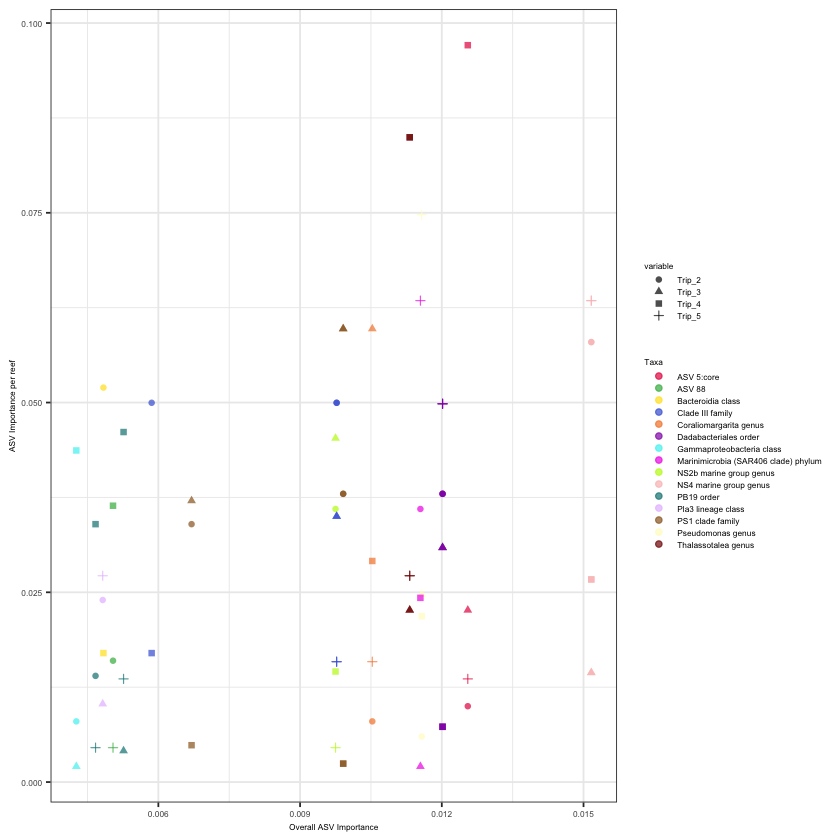

In [533]:
lab1=c("Feb-Mar", "Jun-Jul", "Sept", "Dec")
fig_rf_month= df_reef_long%>%
filter(all>=0.001) %>%
filter(value>=0.001) %>%
mutate_if( is.character, stringr::str_replace_all, pattern = "_", replacement = " ") %>%
ggplot(
           aes(x=all, y = value)) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_point(aes(shape=variable, color=species), alpha=0.7) +
scale_color_manual("Taxa", values=c('#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0',
                                    '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', 
                                    '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000'
)) +
guides(fill = guide_legend(keywidth = 1, , keyheight =.10, ncol=1)) +
#scale_shape_manual("Month", values=c(3, 16, 18, 1),  labels= lab1) +
ylab("ASV Importance per reef") +
xlab("Overall ASV Importance") +
theme_bw() +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5),
    # legend.position = "top"
     ) +
  guides(
         color = guide_legend(order = 2, ncol=1, 
         keyheight = unit(0.1, 'inch'),
                             #title.position = "top", 
                              #title.hjust = 3
                             ), 
         shape = guide_legend(order = 1, ncol=1,
         keyheight = unit(0.1, 'inch'),
                             
                             #title.position = "top", 
                              #title.hjust = 0.5
                             )) +
theme(strip.text.x = element_text(size=5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5))   
fig_rf_month
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/rf_month.png", 
      width = 4, height = 4.5, units = "in", dpi=300)

In [524]:
predictors <- t(otu_table(ps_fill))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$reef)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


reef.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
reef.classify

tax_reef= cbind(as.data.frame(reef.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) #%>%
#head()

tax_reef %>%
arrange(-ndr) %>%
head()


df_reef_long=rf_reef_df  %>%
rownames_to_column() %>%
  pivot_longer(cols = c(Trip_2, Trip_3, Trip_), names_to = "variable") %>%
  group_by(variable)

[1]  125 1166

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,cf,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,cf,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 31, 47, 47
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 19.665
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.14105482
        (OOB) Normalized Brier score: 0.63474669
                           (OOB) AUC: 0.88550626
   (OOB) Requested performance error: 0.288, 0.77419355, 0.12765957, 0.12765957

Confusion matrix:

          predicted
  observed cf ndr pr class.error
       cf   7  13 11      0.7742
       ndr  4  41  2      0.1277
       pr   2   4 41      0.1277

      (OOB) Misclassification rate

,all,cf,ndr,pr,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_109,0.010093047,0.015345139,0.04337684,0.018796630,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family
ASV_273,0.007253705,-0.008768651,0.03180968,0.026026103,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacteriaceae family,Flavobacteriaceae family
ASV_252,0.006487859,0.010960814,0.03036379,0.008675368,Bacteria,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain
ASV_443,0.005043731,-0.010960814,0.02602610,0.017350735,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,NS9 marine group,NS9 marine group family,NS9 marine group family
ASV_14,0.004429137,0.015345139,0.02313431,-0.001445895,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrionaceae family,Vibrionaceae family
ASV_46,0.005255499,-0.008768651,0.02313431,0.020242524,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus CC9902,Synechococcus CC9902 genus


In [528]:
set.seed(2)
# Create a list to store the results
result_list <- list()

# Define the column names for sorting
sort_columns <- c("pr", "ndr", "cf")

# Loop through the sorting columns
for (col in sort_columns) {
  result <- cbind(as.data.frame(reef.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
    arrange(desc(get(col))) %>%
    head() %>%
    distinct()  # Remove duplicate rows
    
  # Assign the result to the list
  result_list[[paste0(col, "_5")]] <- result
}

# Combine the results into a single data frame
rf_reef_df <- do.call(rbind, result_list)




In [530]:
write.csv(rf_reef_df, "/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/rf_reef_df.csv",
         )

In [522]:
tax_reef %>%
arrange(-pr) %>%
head(n=10)

rf_reef_df %>% arrange(-all)  
#%>%  head(n=10)

,all,cf,ndr,pr,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_526,0.002216394,-0.006576488,-0.002891789,0.02313431,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family
ASV_109,0.006427603,-0.008768651,0.028917892,0.02313431,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family
ASV_94,0.004035667,-0.008768651,0.015904840,0.01879663,Bacteria,Bacteroidota,Bacteroidia,Bacteroidia class,ASV_94:Bacteroidia,ASV_94:Bacteroidia family,ASV_94:Bacteroidia family
ASV_368,0.004397907,-0.008768651,0.018796630,0.01879663,Bacteria,Proteobacteria,Alphaproteobacteria,Alphaproteobacteria class,Alphaproteobacteria class,Alphaproteobacteria class,Alphaproteobacteria class
ASV_704,0.002408091,-0.002192163,0.002891789,0.01590484,Bacteria,Proteobacteria,Alphaproteobacteria,Alphaproteobacteria class,Alphaproteobacteria class,Alphaproteobacteria class,Alphaproteobacteria class
ASV_23,0.002822604,0.002192163,0.004337684,0.01445895,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Cyanobiaceae:core,Cyanobiaceae:core
ASV_699,0.007251954,0.019729465,0.024580208,0.01445895,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
ASV_223,0.005473401,-0.004384326,0.027471997,0.01445895,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
ASV_198,0.003234108,-0.004384326,0.013013051,0.01301305,Bacteria,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain


,all,cf,ndr,pr,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ndr_5.ASV_699,0.007251954,0.019729465,0.024580208,0.014458946,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
cf_5.ASV_699,0.007251954,0.019729465,0.024580208,0.014458946,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
pr_5.ASV_109,0.006427603,-0.008768651,0.028917892,0.023134313,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family
ndr_5.ASV_109,0.006427603,-0.008768651,0.028917892,0.023134313,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family
ndr_5.ASV_223,0.005473401,-0.004384326,0.027471997,0.014458946,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
cf_5.ASV_14,0.005434108,0.026305953,0.017350735,0.004337684,Bacteria,Proteobacteria,Gammaproteobacteria,Vibrionales,Vibrionaceae,Vibrionaceae family,Vibrionaceae family
ndr_5.ASV_2548,0.005245528,0.013152977,0.020242524,0.008675368,ASV_2548,ASV_2548,ASV_2548,ASV_2548,ASV_2548,ASV_2548,ASV_2548
ndr_5.ASV_172,0.004663996,0.002192163,0.021688419,0.010121262,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Halieaceae,OM60(NOR5) clade,OM60(NOR5) clade genus
pr_5.ASV_368,0.004397907,-0.008768651,0.018796630,0.018796630,Bacteria,Proteobacteria,Alphaproteobacteria,Alphaproteobacteria class,Alphaproteobacteria class,Alphaproteobacteria class,Alphaproteobacteria class


In [345]:
rf_reef_df

,all,cf,ndr,pr,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
pr_5.ASV_198,0.007672974,0.006576488,0.018796630,0.031809681,Bacteria,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain
pr_5.ASV_109,0.007717209,-0.017537302,0.036147365,0.030363786,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family
pr_5.ASV_273,0.004663641,-0.002192163,0.005783578,0.028917892,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacteriaceae family,Flavobacteriaceae family
pr_5.ASV_699,0.009490848,0.013152977,0.033255576,0.026026103,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
pr_5.ASV_443,0.007092512,-0.002192163,0.027471997,0.024580208,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,NS9 marine group,NS9 marine group family,NS9 marine group family
pr_5.ASV_526,0.004057306,-0.002192163,0.007229473,0.023134313,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family
ndr_5.ASV_172,0.005083127,-0.026305953,0.043376838,0.010121262,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Halieaceae,OM60(NOR5) clade,OM60(NOR5) clade genus
ndr_5.ASV_223,0.007092699,0.006576488,0.037593259,0.008675368,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
ndr_5.ASV_109,0.007717209,-0.017537302,0.036147365,0.030363786,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,Rhodobacteraceae family,Rhodobacteraceae family


In [335]:
df_reef_long=rf_reef_df  %>%
rownames_to_column() %>%
  pivot_longer(cols = c(ndr, cf, pr), names_to = "variable") %>%
  group_by(variable)

`mutate_if()` ignored the following grouping variables:
• Column `variable`


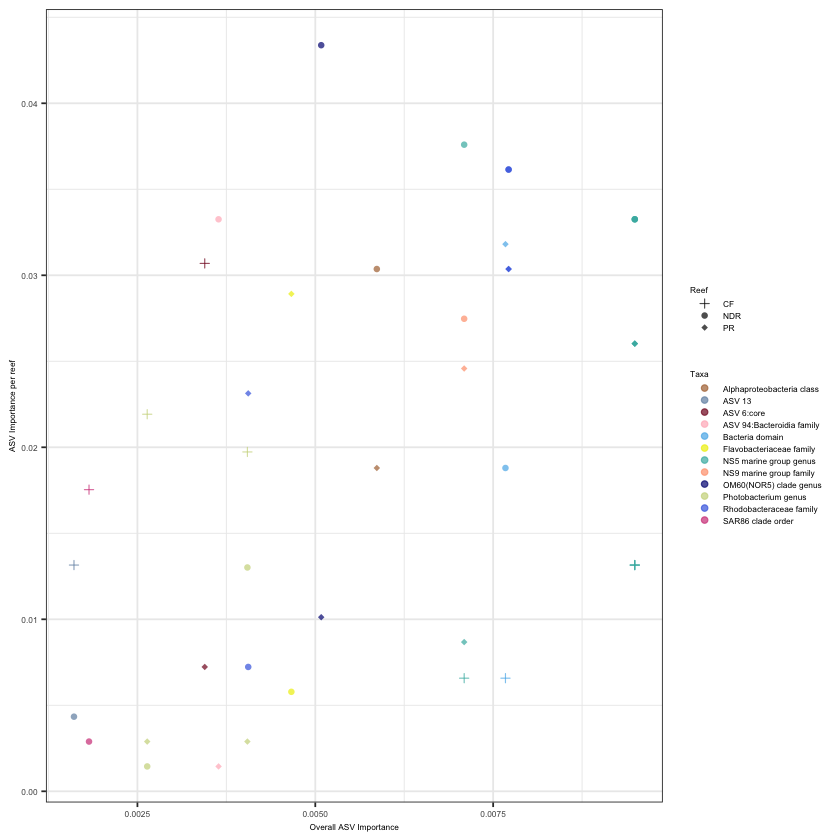

In [319]:
lab2=c("CF", "NDR", "PR")
fig_rf_reef=df_reef_long%>%
filter(all>=0.001) %>%
filter(value>=0.001) %>%
mutate_if( is.character, stringr::str_replace_all, pattern = "_", replacement = " ") %>%
ggplot(
           aes(x=all, y = value)) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_point(aes(shape=variable, color=species), alpha=0.7) +
scale_color_manual("Taxa", values=c( "#AD6F3B", "#6F8FAF", "#800020", "lightpink", "#56B4E9", "yellow2", "#40B5AD",
                                    "lightsalmon", "#000080", "#CBD588", "royalblue", "#D14285", "aquamarine4", "lightgreen", 
                                    "#5F7FC7", "#652926")) +
guides(fill = guide_legend(keywidth = 1, , keyheight =.10, ncol=1)) +
scale_shape_manual("Reef", values=c(3, 16, 18),  labels= lab2) +
ylab("ASV Importance per reef") +
xlab("Overall ASV Importance") +
theme_bw() +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=5),
    # legend.position = "top"
     ) +
  guides(
         color = guide_legend(order = 2, ncol=1, 
         keyheight = unit(0.1, 'inch'),
                             #title.position = "top", 
                              #title.hjust = 3
                             ), 
         shape = guide_legend(order = 1, ncol=1,
         keyheight = unit(0.1, 'inch'),
                             
                             #title.position = "top", 
                              #title.hjust = 0.5
                             )) +
theme(strip.text.x = element_text(size=5)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 5)) 
fig_rf_reef
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/rf_reef.png", 
      width = 4, height = 4.5, units = "in", dpi=300)

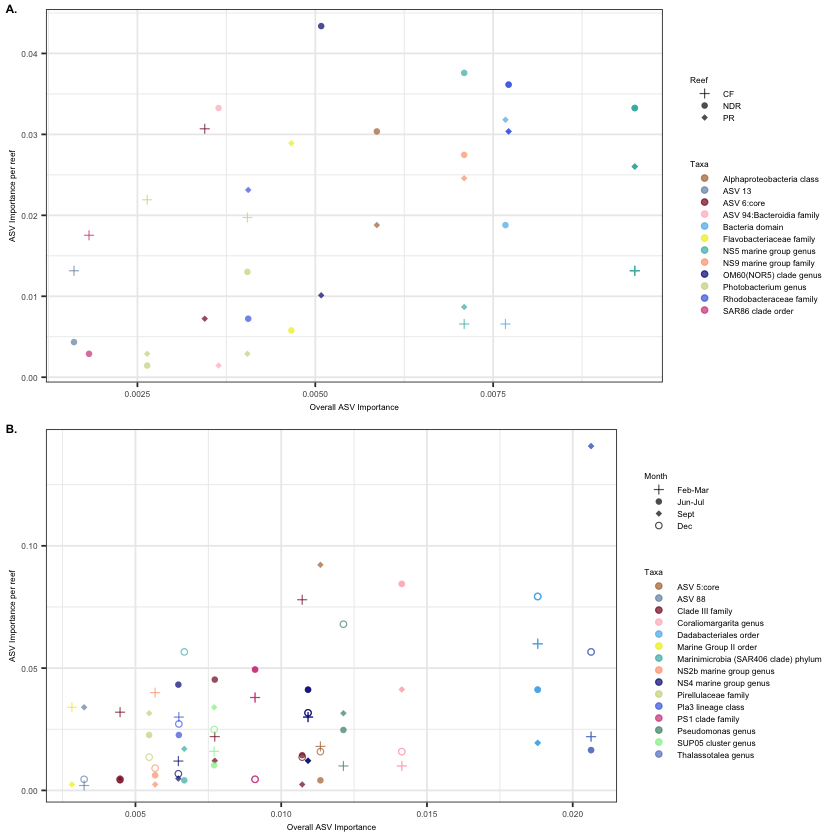

In [330]:
ggpubr::ggarrange(fig_rf_reef, fig_rf_month,
                  common.legend = FALSE, nrow=2,
                labels = c("A.", "B."), font.label = list(size = 7))
ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig4.png", 
      width = 5, height = 5, units = "in", dpi=300)

In [262]:
predictors <- t(otu_table(ps_fill))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$Survivorship)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
Surv.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
Surv.classify

tax_Surv= cbind(as.data.frame(Surv.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

tax_Surv %>%
arrange(-1)

[1]  125 1166

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,0.357142857,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,0.642857143,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 1, 1, 2, 4, 6, 11, 2, 8, 12, 27, 51
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 31.2925
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.06032297
        (OOB) Normalized Brier score: 0.72990797
                           (OOB) AUC: 0.62518812
   (OOB) Requested performance error: 0.52, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.48148148, 0.09803922

Confusion matrix:

             predicted
  observed    0.142857143 0.357142857 0.571428571 0.642857143 0.714285714
  0.142857143           0           0           0 

,all,0.142857143,0.357142857,0.571428571,0.642857143,0.714285714,0.761904762,0.80952381,0.857142857,0.904761905,0.952380952,1,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_164,0.009674719,0,0,0,0,0.02265235,0.006177913,0,0.000000000,2.265235e-02,0.03523699,0.035977259,ASV_164,ASV_164,ASV_164,ASV_164,ASV_164,ASV_164,ASV_164
ASV_223,0.004419566,0,0,0,0,-0.01132617,-0.012355826,0,-0.008494631,2.265235e-02,0.01761849,0.019987366,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NS5 marine group genus
ASV_306,0.004027525,0,0,0,0,0.00000000,0.006177913,0,0.000000000,1.132617e-02,0.02265235,0.010659929,Bacteria,Cyanobacteria,Cyanobacteriia,Cyanobacteriia class,Cyanobacteriia class,Cyanobacteriia class,Cyanobacteriia class
ASV_12,0.003212497,0,0,0,0,0.00000000,0.012355826,0,0.000000000,1.132617e-02,0.02013542,0.005329964,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,Spirochaeta 2 genus
ASV_289,0.002822712,0,0,0,0,0.00000000,0.000000000,0,0.000000000,-1.508950e-17,0.02013542,0.007994947,ASV_289,ASV_289,ASV_289,ASV_289,ASV_289,ASV_289,ASV_289
ASV_198,0.002801560,0,0,0,0,0.01132617,0.006177913,0,0.000000000,0.000000e+00,0.01258464,0.009327438,Bacteria,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain


In [16]:
predictors <- t(otu_table(ps_ndr))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_ndr)$Survivorship)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
Surv.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
Surv.classify

tax_Surv= cbind(as.data.frame(Surv.classify$importance), as.data.frame(tax_table(ps_ndr))) %>%
arrange(-all) %>%
head()

tax_Surv %>%
arrange(-0.952380952)

[1]   47 1166

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CN4_32_ndr_Trip_3,1,0,0,30,56,0,0,0,36,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_38_ndr_Trip_3,1,0,0,0,29,0,0,0,15,0,⋯,0,7,0,0,0,0,0,0,0,0


                         Sample size: 47
           Frequency of class labels: 12, 24, 11
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 9.0475
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 30
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.18308712
        (OOB) Normalized Brier score: 0.82389203
                           (OOB) AUC: 0.72906145
   (OOB) Requested performance error: 0.44680851, 1, 0.08333333, 0.63636364

Confusion matrix:

             predicted
  observed    0.904761905 0.952380952 1 class.error
  0.904761905           0          12 0      1.0000
  0.952380952           0          22 2      0.0833
  1          

,all,0.904761905,0.952380952,1,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_164,0.030630846,-2.263424e-17,0.099104025,0.13591409,ASV_164,ASV_164,ASV_164,ASV_164,ASV_164,ASV_164,ASV_164
ASV_289,0.015541680,1.132617e-02,0.062293959,0.03088957,ASV_289,ASV_289,ASV_289,ASV_289,ASV_289,ASV_289,ASV_289
ASV_10,0.013900195,2.831544e-02,0.033978523,0.05560122,ASV_10,ASV_10,ASV_10,ASV_10,ASV_10,ASV_10,ASV_10
ASV_3,0.008142666,5.663087e-03,0.008494631,0.06795705,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,Spirochaeta 2 genus
ASV_25,0.006984274,2.831544e-02,0.014157718,0.01853374,ASV_25,ASV_25,ASV_25,ASV_25,ASV_25,ASV_25,ASV_25
ASV_12,0.004845051,2.265235e-02,0.014157718,0.00000000,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,Spirochaeta 2 genus


In [18]:
predictors <- t(otu_table(ps_cf))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_cf)$Survivorship)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
Surv.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
Surv.classify

tax_Surv= cbind(as.data.frame(Surv.classify$importance), as.data.frame(tax_table(ps_cf))) %>%
arrange(-all) %>%
head()

tax_Surv 

[1]   31 1166

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,0.357142857,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,0.642857143,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 31
           Frequency of class labels: 1, 1, 2, 4, 6, 11, 6
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 9.1725
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 20
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.11010806
        (OOB) Normalized Brier score: 0.89921585
                           (OOB) AUC: 0.47455808
   (OOB) Requested performance error: 0.58064516, 1, 1, 1, 1, 0.5, 0.45454545, 0.33333333

Confusion matrix:

             predicted
  observed    0.142857143 0.357142857 0.571428571 0.642857143 0.714285714
  0.142857143           0           0           0           0          

,all,0.142857143,0.357142857,0.571428571,0.642857143,0.714285714,0.761904762,0.857142857,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_237,0.014761772,0,0,0,0.00000000,0.04530470,9.884661e-02,-0.02265235,Bacteria,Bdellovibrionota,Bdellovibrionia,Bacteriovoracales,Bacteriovoracaceae,Bacteriovoracaceae family,Bacteriovoracaceae family
ASV_59,0.011397849,0,0,0,0.00000000,-0.01132617,1.853374e-02,0.13591409,Bacteria,SAR324 clade(Marine group B),SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum,SAR324 clade(Marine group B) phylum
ASV_20,0.009733037,0,0,0,0.00000000,0.02265235,3.706748e-02,0.04530470,Bacteria,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain,Bacteria domain
ASV_3,0.008118280,0,0,0,0.01698926,0.01132617,2.471165e-02,0.04530470,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,Spirochaeta 2 genus
ASV_1970,0.007363737,0,0,0,0.00000000,0.11326174,-1.235583e-02,0.01132617,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade II,Clade II family,Clade II family
ASV_2147,0.005808306,0,0,0,0.00000000,0.05663087,7.544748e-18,0.02265235,Bacteria,Proteobacteria,Gammaproteobacteria,Gammaproteobacteria class,Gammaproteobacteria class,Gammaproteobacteria class,Gammaproteobacteria class


In [21]:
predictors <- t(otu_table(ps_fill))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$N.N.uM)

# Combine them into 1 data frame
rf.data <- data.frame(sqrtresponse, predictors)
head(rf.data, n=2)


set.seed(2)
NO2.classify <- rfsrc((response)~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
NO2.classify

tax_NO2= cbind(as.data.frame(NO2.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

tax_NO2 %>%
arrange(-all)

[1]  125 1166

ERROR: Error in eval(expr, envir, enclos): object 'sqrtresponse' not found


In [184]:
predictors <- t(otu_table(ps_fill))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$NO2.uM)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
NO2.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
NO2.classify

tax_NO2= cbind(as.data.frame(NO2.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

tax_NO2 %>%
arrange(-all)

[1]  125 1166

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,0.032,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,0.032,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 12, 11, 7, 12, 12, 10, 12, 12, 12, 9, 16
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 31.805
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.05349758
        (OOB) Normalized Brier score: 0.64732073
                           (OOB) AUC: 0.95928673
   (OOB) Requested performance error: 0.304, 0.16666667, 0.36363636, 0.71428571, 0.08333333, 0, 0.6, 0.25, 0.66666667, 0, 0.55555556, 0.25

Confusion matrix:

             predicted
  observed    0.015 0.015833333 0.017666667 0.017833333 0.0215 0.022 0.024


,all,0.015,0.015833333,0.017666667,0.017833333,0.0215,0.022,0.024,0.025714286,0.0285,0.032,0.033333333,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_639,0.009104502,0.000000000,0.00000000,0.000000000,0.09060939,0.02265235,0.020387114,3.964161e-02,5.663087e-03,0.05096778,0.015101566,0.012741946,Bacteria,NA,NA,NA,NA,NA,NA
ASV_636,0.008288516,0.005663087,0.00000000,0.000000000,0.16989261,0.01132617,-0.006795705,-5.663087e-03,5.663087e-03,0.01132617,0.022652349,0.016989261,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade I,Clade Ia,NA
ASV_5,0.008261737,0.022652349,0.01235583,-0.009708149,0.01132617,0.01132617,-0.013591409,1.698926e-02,0.000000e+00,0.01132617,-0.015101566,0.131666776,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core
ASV_1042,0.008252257,0.022652349,0.00000000,0.019416299,0.01132617,0.11892483,0.020387114,5.663087e-03,1.698926e-02,0.00000000,0.007550783,0.016989261,Bacteria,Verrucomicrobiota,Kiritimatiellae,Kiritimatiellales,Kiritimatiellaceae,R76-B128,NA
ASV_865,0.007876253,-0.016989261,0.02471165,0.019416299,0.01698926,0.03964161,0.013591409,-2.263424e-17,1.698926e-02,0.01698926,0.052855480,0.046720469,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Thalassotalea,NA
ASV_94,0.007638356,-0.011326174,0.02471165,0.038832598,-0.01132617,0.11326174,-0.006795705,2.831544e-02,7.544748e-18,0.01698926,0.037753914,0.008494631,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA


In [106]:
TAX <- tax_table(as.matrix(tax_NO2))
ps <- phyloseq(ASV, TAX , SAMP)
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:          [ 6 taxa and 363 samples ]:
sample_data() Sample Data:        [ 363 samples by 56 sample variables ]:
tax_table()   Taxonomy Table:     [ 6 taxa by 20 taxonomic ranks ]:
taxa are rows

In [185]:
predictors <- t(otu_table(ps_fill))
dim(predictors)
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$NO3.uM)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
NO2.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
NO2.classify

tax_NO2= cbind(as.data.frame(NO2.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

tax_NO2 %>%
arrange(-all)

[1]  125 1166

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,0.861,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,0.861,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 12, 7, 11, 12, 9, 12, 12, 10, 11, 12, 5, 12
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 32.75
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.05110499
        (OOB) Normalized Brier score: 0.66901076
                           (OOB) AUC: 0.94363846
   (OOB) Requested performance error: 0.304, 0.08333333, 1, 0.45454545, 0.41666667, 0.22222222, 0.16666667, 0.25, 0.6, 0.18181818, 0, 1, 0

Confusion matrix:

             predicted
  observed    0.11 0.254333333 0.290333333 0.714 0.861 0.875 0.907142857 

,all,0.11,0.254333333,0.290333333,0.714,0.861,0.875,0.907142857,0.974,1.028333333,1.5005,1.518333333,1.559,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_531,0.011315847,1.245879e-01,-0.009708149,0.006177913,0.005663087,0.030203131,3.397852e-02,0.00000000,2.718282e-02,-0.006177913,7.362013e-02,0.01359141,0.03397852,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA
ASV_412,0.007855235,2.831544e-02,0.009708149,0.006177913,0.005663087,-0.007550783,5.663087e-02,0.03964161,-7.544748e-18,0.024711653,0.000000e+00,0.01359141,0.05663087,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NA
ASV_865,0.007090625,1.508950e-17,0.009708149,0.043245393,0.011326174,0.037753914,-7.544748e-18,0.02265235,6.795705e-03,0.024711653,7.544748e-18,0.01359141,0.05663087,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Thalassotalea,NA
ASV_639,0.006877936,5.096778e-02,0.000000000,0.012355826,0.005663087,0.037753914,2.265235e-02,-0.01132617,-6.795705e-03,0.043245393,3.397852e-02,-0.01359141,0.02265235,Bacteria,NA,NA,NA,NA,NA,NA
ASV_94,0.006661738,1.132617e-02,0.000000000,0.012355826,-0.011326174,0.022652349,5.663087e-03,0.02265235,2.263424e-17,0.024711653,2.265235e-02,0.01359141,0.07928322,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_251,0.006633453,5.663087e-03,0.009708149,0.006177913,0.005663087,-0.015101566,-5.663087e-03,0.02831544,6.795705e-03,0.080312872,1.132617e-02,0.02718282,0.05096778,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NA,NA


In [16]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$avgSST_degC)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
avgSST_degC.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
avgSST_degC.classify

cbind(as.data.frame(avgSST_degC.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,29.63623347,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,29.63623347,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 10, 12, 12, 12, 11, 7, 11, 12, 5, 12, 9, 12
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 32.75
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.05110499
        (OOB) Normalized Brier score: 0.66901076
                           (OOB) AUC: 0.94363846
   (OOB) Requested performance error: 0.296, 0.6, 0.33333333, 0.16666667, 0.08333333, 0.45454545, 1, 0.18181818, 0.25, 1, 0, 0.22222222, 0

Confusion matrix:

             predicted
  observed    25.96821074 25.99442252 26.45430714 27.19707857 27.43930579

,all,25.96821074,25.99442252,26.45430714,27.19707857,27.43930579,27.62378409,29.0513381,29.12767665,29.41867975,29.49291322,29.63623347,30.03815238,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_531,0.010714287,0.020387114,0.000000000,0.04530470,9.627248e-02,0.012355826,0.009708149,0.018533740,0.011326174,0.01359141,0.04530470,0.000000000,4.530470e-02,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA
ASV_412,0.007856715,0.027182818,-0.005663087,0.07362013,1.698926e-02,0.012355826,0.009708149,0.006177913,0.033978523,0.01359141,0.04530470,0.007550783,0.000000e+00,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NA
ASV_865,0.007500408,-0.013591409,0.011326174,0.01132617,7.544748e-18,0.061779132,0.048540747,0.006177913,0.016989261,0.01359141,0.05096778,0.045304697,0.000000e+00,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Thalassotalea,NA
ASV_200,0.007445069,-0.006795705,0.011326174,0.02265235,1.245879e-01,0.000000000,0.019416299,0.006177913,0.016989261,0.00000000,0.02265235,-0.007550783,5.663087e-03,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA
ASV_94,0.006859993,0.033978523,-0.016989261,0.02265235,5.663087e-03,0.006177913,-0.009708149,0.024711653,0.005663087,0.01359141,0.07928322,0.022652349,2.265235e-02,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_172,0.006438893,0.006795705,-0.005663087,0.02265235,1.132617e-02,0.043245393,0.009708149,0.043245393,-0.011326174,0.01359141,0.06795705,0.000000000,-7.544748e-18,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Halieaceae,OM60(NOR5) clade,NA


In [10]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$Speed.cm.s)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
Speed.cm.s.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
Speed.cm.s.classify

cbind(as.data.frame(Speed.cm.s.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_365,ASV_535,ASV_338,ASV_930,ASV_548,ASV_374,ASV_621,ASV_925,⋯,ASV_1185,ASV_1313,ASV_1321,ASV_1399,ASV_1429,ASV_1511,ASV_1546,ASV_1827,ASV_1966,ASV_2147
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bagnumber-1009,4.852118056,0,0,14,0,0,0,0,0,0,⋯,6,0,0,0,0,0,0,0,0,0
bagnumber-1010,4.852118056,0,7,21,0,10,0,12,0,0,⋯,8,0,12,0,0,15,0,0,0,0


                         Sample size: 363
           Frequency of class labels: 26, 35, 45, 25, 37, 36, 36, 34, 54, 35
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 92.5575
No. of variables tried at each split: 20
              Total no. of variables: 375
       Resampling used to grow trees: swor
    Resample size used to grow trees: 229
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.05701524
        (OOB) Normalized Brier score: 0.63350266
                           (OOB) AUC: 0.94750451
   (OOB) Requested performance error: 0.28374656, 0.53846154, 0.22857143, 0.13333333, 0.48, 0.08108108, 0.25, 0.13888889, 0.44117647, 0.27777778, 0.45714286

Confusion matrix:

             predicted
  observed    4.306533713 4.388159722 4.795925926 4.852118

,all,4.306533713,4.388159722,4.795925926,4.852118056,5.229809028,5.33154908,5.542543403,5.699322917,6.026627907,6.636767068,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_5,0.01908938,0.026137325,0.03300771,0.262767243,0.03533766,0.02387680,0.035866219,0.005663087,2.198610e-02,-0.003775391,0.033007708,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core,ASV_5:core
ASV_200,0.01611499,0.002613733,-0.01359141,0.039264071,0.01359141,0.02020345,0.020764653,0.022652349,9.993683e-03,0.201354210,0.013591409,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA
ASV_109,0.01380598,0.020909860,0.06213216,0.025672662,0.02174625,0.12122068,0.052855480,0.015101566,0.000000e+00,0.026427740,0.019416299,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,NA,NA
ASV_305,0.01366525,0.015682395,0.03106608,0.033223445,0.07883017,0.02755015,0.009438479,0.120812526,2.398484e-02,0.040270842,-0.009708149,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_46,0.01087934,0.005227465,0.03494934,0.016611722,0.01630969,0.11203729,0.058518567,0.022652349,-4.526849e-17,0.020135421,-0.001941630,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus CC9902,NA
ASV_68,0.01087156,-0.002613733,0.04271586,-0.007550783,0.01630969,0.02571348,0.073620133,0.011326174,7.795073e-02,0.023910812,0.033007708,NA,NA,NA,NA,ASV_68,NA,NA


In [17]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$cluster_depth)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
avgchla_mgm.3.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
avgchla_mgm.3.classify

cbind(as.data.frame(avgchla_mgm.3.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,-20.9,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,-17.9,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 123
           Frequency of class labels: 4, 2, 4, 4, 3, 8, 4, 2, 4, 10, 4, 8, 8, 12, 4, 7, 12, 11, 4, 4, 4
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 44.85
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 78
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.043324
        (OOB) Normalized Brier score: 0.95529419
                           (OOB) AUC: 0.6025233
   (OOB) Requested performance error: 0.78861789, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.6, 1, 0.125, 1, 0.5, 1, 0.71428571, 0.75, 0.63636364, 1, 1, 1

Confusion matrix:

          predicted
  observed -20.9 -20.8 -20.6 -19.6 -18.8 -18.7 -18.6 -1

,all,-20.9,-20.8,-20.6,-19.6,-18.8,-18.7,-18.6,-17.9,-17.8,⋯,-11.7,-11.6,-10.7,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_12,0.009022195,0,0.00000000,0.00000000,0,0,-0.016989261,0,0,0.00000000,⋯,-0.01698926,0.00000000,-0.03397852,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,NA
ASV_549,0.004740631,0,-0.03397852,0.00000000,0,0,0.000000000,0,0,0.00000000,⋯,0.00000000,0.00000000,0.00000000,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NA,NA
ASV_20,0.003688801,0,0.00000000,0.00000000,0,0,0.000000000,0,0,0.00000000,⋯,0.00000000,0.03397852,0.01698926,Bacteria,NA,NA,NA,NA,NA,NA
ASV_699,0.003278854,0,0.00000000,0.00000000,0,0,0.000000000,0,0,0.00000000,⋯,0.00000000,0.00000000,0.00000000,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA
ASV_3,0.002471151,0,0.00000000,0.00000000,0,0,0.008494631,0,0,-0.01698926,⋯,0.03397852,0.00000000,0.01698926,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,NA
ASV_46,0.002261068,0,0.00000000,0.01698926,0,0,0.000000000,0,0,0.00000000,⋯,0.00000000,0.00000000,0.00000000,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus CC9902,NA


In [72]:
colnames(sample_data(ps_fill))

[1] "collection_date"       "Speed.cm.s."           "Bearing.degrees."     
 [4] "Velocity.N.cm.s."      "Velocity.E.cm.s."      "Temperature.C."       
 [7] "reef"                  "Genotype"              "Fragment_number"      
[10] "Month"                 "Year"                  "Fragment_num"         
[13] "day"                   "Survey."               "LiveFrag"             
[16] "L"                     "W"                     "H"                    
[19] "Adjusted.Area"         "S01FragCount"          "Year.x"               
[22] "Si.uM."                "NO2.uM."               "N.N.uM."              
[25] "NO3.uM."               "PO4.uM."               "sample_ID"            
[28] "sample_ID2"            "Health"                "Month.x"              
[31] "Samp_trip"             "joining_info"          "order"                
[34] "species"               "time_Reef"             "Cluster"              
[37] "sampling_trip"         "geno_clus"             "X"                    
[40] "colour_reef"           "colour_genotype"       "colour_reef_genotype" 
[43] "colour_timepoint"      "colour_timepoint_reef" "cluster_latitude"     
[46] "cluster_longitude"     "cluster_depth"         "depth"                
[49] "Year.y"                "Month.y"               "Lat_decimal"          
[52] "Long_decimal"          "avgchla_mgm.3"         "sdchla_mgm.3"         
[55] "avgSST_degC"           "sdSST_degC"

In [18]:


# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$Si.uM.)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
Si.uM.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
Si.uM.classify

cbind(as.data.frame(Si.uM.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,0.706,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,0.706,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 11, 5, 12, 12, 12, 10, 7, 12, 12, 12, 9, 11
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 32.75
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.05110499
        (OOB) Normalized Brier score: 0.66901076
                           (OOB) AUC: 0.94363846
   (OOB) Requested performance error: 0.296, 0.18181818, 1, 0.08333333, 0.25, 0.16666667, 0.6, 1, 0.33333333, 0, 0, 0.22222222, 0.45454545

Confusion matrix:

             predicted
  observed    0.033333333 0.066666667 0.159166667 0.2 0.308 0.335 0.42616

,all,0.033333333,0.066666667,0.159166667,0.2,0.308,0.335,0.426166667,0.504,0.5265,0.613,0.706,1.904166667,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_531,0.009497593,1.853374e-02,0.01359141,0.118924830,0.005663087,0.028315436,0.013591409,-0.009708149,1.698926e-02,0.04530470,6.229396e-02,-0.045304697,-0.006177913,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA
ASV_94,0.009285903,6.177913e-03,0.00000000,0.005663087,0.016989261,0.028315436,0.047569932,0.009708149,7.544748e-18,0.10193557,1.132617e-02,0.030203131,0.024711653,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_200,0.008458379,1.235583e-02,0.01359141,0.124587917,0.033978523,0.011326174,0.006795705,0.000000000,1.132617e-02,0.03964161,7.544748e-18,0.000000000,-0.006177913,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA
ASV_412,0.008264885,6.177913e-03,0.00000000,0.028315436,0.033978523,0.056630871,0.013591409,0.009708149,1.508950e-17,0.05096778,1.132617e-02,0.007550783,0.024711653,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NA
ASV_305,0.006866550,7.544748e-18,0.00000000,0.039641610,0.011326174,0.005663087,0.000000000,-0.009708149,1.698926e-02,0.03964161,6.795705e-02,0.015101566,0.006177913,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_535,0.006655286,6.177913e-03,0.00000000,0.062293959,0.022652349,0.016989261,0.013591409,0.000000000,5.663087e-03,0.02831544,-1.132617e-02,0.045304697,0.012355826,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA


In [19]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$PO4.uM.)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
PO4.uM.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
PO4.uM.classify

cbind(as.data.frame(PO4.uM.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,0.0685,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,0.0685,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 12, 12, 12, 10, 12, 5, 11, 7, 12, 9, 11, 12
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 32.75
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.05110499
        (OOB) Normalized Brier score: 0.66901076
                           (OOB) AUC: 0.94363846
   (OOB) Requested performance error: 0.304, 0, 0.08333333, 0.41666667, 0.6, 0, 1, 0.18181818, 1, 0.16666667, 0.22222222, 0.45454545, 0.25

Confusion matrix:

             predicted
  observed    0.023 0.029666667 0.037 0.039 0.044 0.046666667 0.05 0.055 

,all,0.023,0.029666667,0.037,0.039,0.044,0.046666667,0.05,0.055,0.056,0.0685,0.074833333,0.082857143,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_94,0.012301916,0.16422953,0.011326174,-0.011326174,0.040774227,0.005663087,0,0.012355826,0.03883260,0.039641610,3.020313e-02,6.177913e-03,0.03964161,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_531,0.011715652,0.03964161,0.124587917,0.005663087,0.020387114,0.118924830,0,0.012355826,0.00000000,0.022652349,-3.020313e-02,0.000000e+00,0.01132617,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA
ASV_198,0.008668464,0.06795705,0.022652349,0.005663087,0.033978523,0.016989261,0,0.030889566,0.02912445,0.028315436,3.775391e-02,1.235583e-02,-0.01132617,Bacteria,NA,NA,NA,NA,NA,NA
ASV_412,0.008051956,0.05096778,0.028315436,0.000000000,0.040774227,0.000000000,0,-0.006177913,0.00000000,0.050967784,7.550783e-03,2.471165e-02,0.03964161,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NA
ASV_251,0.007660072,0.06795705,0.005663087,-0.005663087,0.020387114,0.016989261,0,0.061779132,0.01941630,-0.005663087,7.544748e-18,1.508950e-17,0.05096778,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NA,NA
ASV_200,0.007445424,0.02265235,0.124587917,0.011326174,-0.006795705,0.005663087,0,0.000000000,0.01941630,0.022652349,0.000000e+00,6.177913e-03,0.01132617,Bacteria,Proteobacteria,Gammaproteobacteria,Thiomicrospirales,Thioglobaceae,SUP05 cluster,NA


In [186]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$Genotype)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
PO4.uM.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
PO4.uM.classify

cbind(as.data.frame(PO4.uM.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head()

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,ML2,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,CN4,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 37, 27, 35, 26
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 25.0225
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.14434264
        (OOB) Normalized Brier score: 0.76982739
                           (OOB) AUC: 0.85383905
   (OOB) Requested performance error: 0.32, 0.10810811, 0.62962963, 0.2, 0.46153846

Confusion matrix:

          predicted
  observed CN2 CN4 HS1 ML2 class.error
       CN2  33   1   2   1      0.1081
       CN4  10  10   6   1      0.6296
       HS1   5   2  28   0      0.2000
  

,all,CN2,CN4,HS1,ML2,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_12,0.02197041,0.018366769,-5.033855e-03,0.15727202,0.05227465,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,NA
ASV_21,0.01955327,0.044080246,7.544748e-18,0.09708149,0.06011585,NA,NA,NA,NA,NA,NA,NA
ASV_3,0.01648509,0.051426954,1.510157e-02,0.01359141,0.10716303,Bacteria,Spirochaetota,Spirochaetia,Spirochaetales,Spirochaetaceae,Spirochaeta 2,NA
ASV_59,0.01572671,0.110200615,5.033855e-03,0.00194163,0.03920599,Bacteria,SAR324 clade(Marine group B),NA,NA,NA,NA,NA
ASV_25,0.01150273,0.056936984,2.768620e-02,-0.01747467,0.06272958,NA,NA,NA,NA,NA,NA,NA
ASV_20,0.01075117,0.003673354,-1.510157e-02,0.08931497,0.02875106,Bacteria,NA,NA,NA,NA,NA,NA


In [193]:
# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$reef)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
PO4.uM.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
PO4.uM.classify

cbind(as.data.frame(PO4.uM.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head(n=10)


# Make one column for our outcome/response variable 

response <- as.factor(sample_data(ps_fill)$Samp_trip)

# Combine them into 1 data frame
rf.data <- data.frame(response, predictors)
head(rf.data, n=2)


set.seed(2)
PO4.uM.classify <- rfsrc(response~., data = rf.data, ntree = 400,
                     importance="permute", csv.num=TRUE)
PO4.uM.classify

cbind(as.data.frame(PO4.uM.classify$importance), as.data.frame(tax_table(ps_fill))) %>%
arrange(-all) %>%
head(n=10)

,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,cf,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,cf,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 31, 47, 47
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 19.6175
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.14007946
        (OOB) Normalized Brier score: 0.63035755
                           (OOB) AUC: 0.87919046
   (OOB) Requested performance error: 0.256, 0.74193548, 0.10638298, 0.08510638

Confusion matrix:

          predicted
  observed cf ndr pr class.error
       cf   8  13 10      0.7419
       ndr  2  42  3      0.1064
       pr   0   4 43      0.0851

      (OOB) Misclassification rat

,all,cf,ndr,pr,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_109,0.009690219,-0.002192163,0.03903915,0.031809681,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodobacterales,Rhodobacteraceae,NA,NA
ASV_94,0.008273108,0.004384326,0.04482273,0.011567157,Bacteria,Bacteroidota,Bacteroidia,NA,ASV_94:Bacteroidia,NA,NA
ASV_443,0.007908473,0.010960814,0.02458021,0.024580208,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,NS9 marine group,NA,NA
ASV_46,0.007071388,0.002192163,0.02313431,0.026026103,Bacteria,Cyanobacteria,Cyanobacteriia,Synechococcales,Cyanobiaceae,Synechococcus CC9902,NA
ASV_2548,0.006651928,0.017537302,0.02313431,0.013013051,NA,NA,NA,NA,NA,NA,NA
ASV_223,0.005873319,-0.002192163,0.03036379,0.013013051,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA
ASV_144,0.005861977,0.006576488,0.02747200,0.010121262,Bacteria,Actinobacteriota,Acidimicrobiia,Actinomarinales,Actinomarinaceae,Candidatus Actinomarina,NA
ASV_489,0.005858944,0.010960814,0.02602610,0.008675368,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS5 marine group,NA
ASV_111,0.005848809,0.008768651,0.02747200,0.008675368,Bacteria,Proteobacteria,Gammaproteobacteria,SAR86 clade,NA,NA,NA


,response,ASV_479,ASV_893,ASV_365,ASV_535,ASV_2096,ASV_772,ASV_1957,ASV_1450,ASV_2272,⋯,ASV_5161,ASV_5172,ASV_5315,ASV_5568,ASV_6632,ASV_13462,ASV_13967,ASV_20040,ASV_20192,ASV_20228
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,Trip_3,0,0,31,47,0,0,0,10,0,⋯,0,0,0,0,0,0,0,0,0,0
CN4_35_cf_Trip_3,Trip_3,0,10,0,133,0,9,22,216,0,⋯,4,0,0,0,0,0,0,0,0,0


                         Sample size: 125
           Frequency of class labels: 34, 33, 28, 30
                     Number of trees: 400
           Forest terminal node size: 1
       Average no. of terminal nodes: 20.2875
No. of variables tried at each split: 35
              Total no. of variables: 1166
       Resampling used to grow trees: swor
    Resample size used to grow trees: 79
                            Analysis: RF-C
                              Family: class
                      Splitting rule: gini *random*
       Number of random split points: 10
                   (OOB) Brier score: 0.08443749
        (OOB) Normalized Brier score: 0.45033328
                           (OOB) AUC: 0.99573625
   (OOB) Requested performance error: 0.024, 0.02941176, 0, 0.03571429, 0.03333333

Confusion matrix:

          predicted
  observed Trip_2 Trip_3 Trip_4 Trip_5 class.error
    Trip_2     33      1      0      0      0.0294
    Trip_3      0     33      0      0      0.0000
    Tr

,all,Trip_2,Trip_3,Trip_4,Trip_5,domain,phylum,class,order,family,genus,species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ASV_865,0.014092489,0.01598989,0.01647444,9.708149e-02,3.171329e-02,Bacteria,Proteobacteria,Gammaproteobacteria,Alteromonadales,Colwelliaceae,Thalassotalea,NA
ASV_963,0.011912346,0.03797600,0.01853374,-7.544748e-18,7.022228e-02,Bacteria,Dadabacteria,Dadabacteriia,Dadabacteriales,NA,NA,NA
ASV_151,0.011725300,0.00599621,0.02471165,2.184334e-02,7.701799e-02,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas,NA
ASV_412,0.010674719,0.02198610,0.03294887,4.854075e-03,5.436564e-02,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS4 marine group,NA
ASV_1299,0.010271716,0.02198610,0.01029652,2.184334e-02,5.889611e-02,Bacteria,Marinimicrobia (SAR406 clade),NA,NA,NA,NA,NA
ASV_1069,0.009468163,0.01798863,0.05148261,2.184334e-02,9.060939e-03,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_1038,0.008661526,0.05796336,0.01441513,9.708149e-03,6.795705e-03,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,NS2b marine group,NA
ASV_245,0.008281774,0.05396589,0.01235583,1.941630e-02,-7.544748e-18,Bacteria,Proteobacteria,Alphaproteobacteria,SAR11 clade,Clade III,NA,NA
ASV_1966,0.007909756,0.03197979,0.04324539,0.000000e+00,4.530470e-03,Bacteria,Proteobacteria,Alphaproteobacteria,Parvibaculales,PS1 clade,NA,NA


In [153]:
GoodTaxa = c(
"ASV_172",
"ASV_46",
"ASV_109",
"ASV_305",
"ASV_94",
"ASV_5",
"ASV_200",
"ASV_1827",
"ASV_68", 
"ASV_12",
"ASV_3",
"ASV_25",
"ASV_20",
"ASV_273")

In [74]:
ps_meta= as(sample_data(ps_fill), "data.frame")
ps_meta_envs = ps_meta %>% select("Genotype", "Samp_trip", "reef",'Speed.cm.s.', 'N.N.uM.','PO4.uM.', 'Si.uM.',
                 "avgSST_degC", "cluster_depth")


In [75]:
sum_ps   <- ps_fill %>%
  tax_glom(taxrank = "order") %>%
  transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

Warning message in psmelt(.):
“The sample variables: 
order, species
 have been renamed to: 
sample_order, sample_species
to avoid conflicts with taxonomic rank names.”


In [76]:
y_columns <- names(ps_meta_envs[4:9])

In [77]:
y_columns 

[1] "Speed.cm.s."   "N.N.uM."       "PO4.uM."       "Si.uM."       
[5] "avgSST_degC"   "cluster_depth"

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 155 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 155 rows containing non-finite values (`stat_poly_eq()`).”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search range. Set to the maximum of the parameter range.”
Warning message:
“Computation failed in `stat_poly_eq()`
Caused by error in `check_output()`:
! out[1] <= out[2] is not TRUE”
Warning message:
“Removed 155 rows containing non-finite values (`stat_poly_eq()`).”
Warning message in ci_f_ncp(stat, df1 = df1, df2 = df2, probs = probs):
“Upper limit outside search r

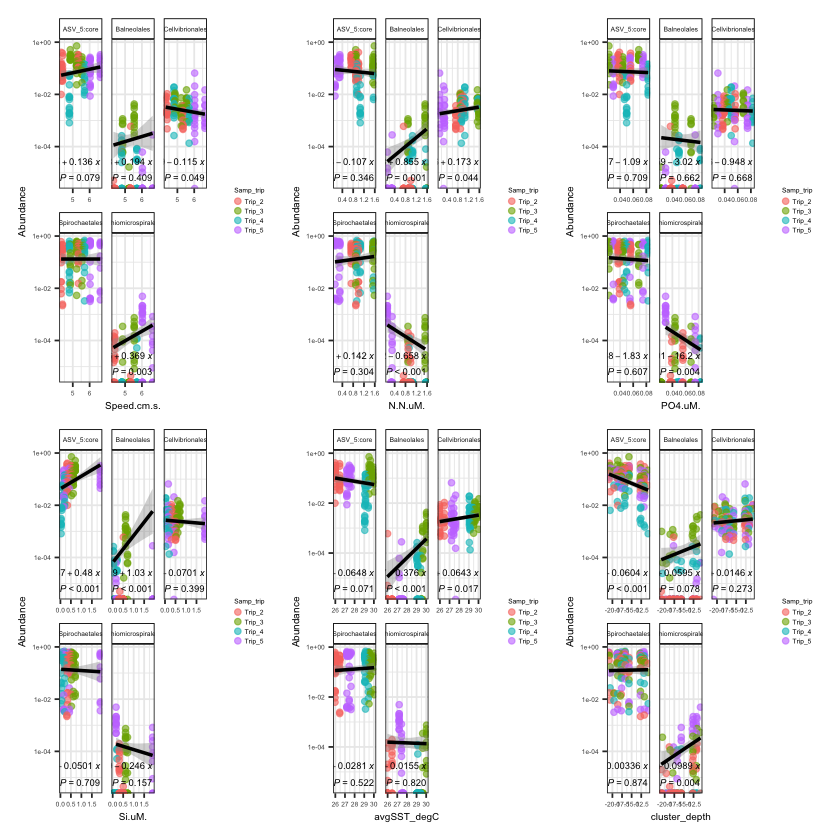

In [78]:



# Create an empty list to store the plots
plots <- list()

# Loop through each y variable and create a plot
for (y_var in y_columns) {
  plot <- sum_ps %>%
    #filter(Abundance>=0.1) %>%
filter(OTU %in% GoodTaxa) %>%
    ggplot(aes( x = .data[[y_var]], y = Abundance, color = Samp_trip)) +
    geom_point(alpha = 0.6) +
    theme_bw() +
    facet_wrap(.~order, scales="free_x") +



    theme(legend.title = element_text(size=5)) +
scale_y_continuous(trans = "log10") +
labs(fill='Taxon')  +
theme(strip.background = element_rect(
     fill="white", color="black", size=.5)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, ncol=1)) +
theme(legend.text =element_text(size=4)) +
theme(legend.title = element_text(size=4)) +
theme(strip.text.x = element_text(size = 4)) +

    geom_smooth(method = 'lm', color = 'black') +
    
    stat_poly_eq(
      formula = y ~ x,
      eq.with.lhs = "italic(hat(y))~`=`~",
      aes(label = paste(..rr.label.., ..p.value.label.., sep = "~~~")),
      parse = TRUE,
      label.y = "bottom",
      label.x = "right",
      color = "black",
      rr.digits = 3,
      size = 2
    ) +
    
    stat_poly_eq(
      aes(label = paste(..eq.label.., sep = "~~~")),
      label.y = 0.15,
      eq.with.lhs = "italic(hat(y))~`=`~",
      eq.x.rhs = "~italic(x)",
      formula = y ~ x,
      parse = TRUE,
      size = 2,
      label.x = "right",
      color = "black"
    )
  
  # Add the plot to the list
  plots[[y_var]] <- plot
}

# Combine all plots into a single plot
combined_plot <- wrap_plots(plots)

# Print the combined plot
print(combined_plot)

In [79]:
dim(otu_table(ps_fill))

dim(ps_meta_envs[4:8])

[1] 1166  125

[1] 125   5

In [88]:
#fil_good= subtable %>%
filter(ASVs %in% GoodTaxa)

ERROR: Error in eval(expr, envir, enclos): object 'subtable' not found


In [264]:
subtable <- filter(correlation.table, p.adj < 0.05)

# Arrange the figure
subtable %>%
filter(ASVs %in% GoodTaxa) %>%
ggplot(aes(x = Env, y = family, fill = Correlation)) + geom_tile(aes(fill = Correlation)) + 
theme_classic() +
 scale_fill_gradientn("Correlation", 
                       breaks = seq(from = -1, to = 1, by = 0.2), 
                   colours = c("darkblue", "blue", "white", "red", "darkred"), 
                   limits = c(-1,1)) +
theme(axis.text.x=element_text(angle = 90, hjust=1),
               axis.text.y=element_text(size = 8, , face = "italic")) +
 xlab("") + ylab("") 



ERROR: Error in eval(expr, envir, enclos): object 'correlation.table' not found


In [137]:
meta_envs=sample_data(ps_meta_envs[4:9])
head(meta_envs)

,Speed.cm.s.,N.N.uM.,PO4.uM.,Si.uM.,avgSST_degC,cluster_depth
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ML2_78_cf_Trip_3,4.852118,0.893,0.0685,0.706,29.63623,-20.9
CN4_35_cf_Trip_3,4.852118,0.893,0.0685,0.706,29.63623,-17.9
CN4_25_cf_Trip_3,4.852118,0.893,0.0685,0.706,29.63623,-20.8
HS1_18_cf_Trip_3,4.852118,0.893,0.0685,0.706,29.63623,-18.8
HS1_17_cf_Trip_3,4.852118,0.893,0.0685,0.706,29.63623,-17.8
HS1_15_cf_Trip_3,4.852118,0.893,0.0685,0.706,29.63623,-17.6


In [154]:
GoodTaxa

[1] "ASV_172"  "ASV_46"   "ASV_109"  "ASV_305"  "ASV_94"   "ASV_5"   
 [7] "ASV_200"  "ASV_1827" "ASV_68"   "ASV_12"   "ASV_3"    "ASV_25"  
[13] "ASV_20"   "ASV_273"

In [176]:
ps <- phyloseq(otu_table(ps_fill), TAX, meta_envs)
ps_ra_ad =  subset_samples(ps, cluster_depth!= "NA")

Proportional min_prevalence given: 0.1 --> min 13/123 samples.

NAs detected in phyloseq tax_table:
Consider using tax_fix() to make taxa uniquely identifiable



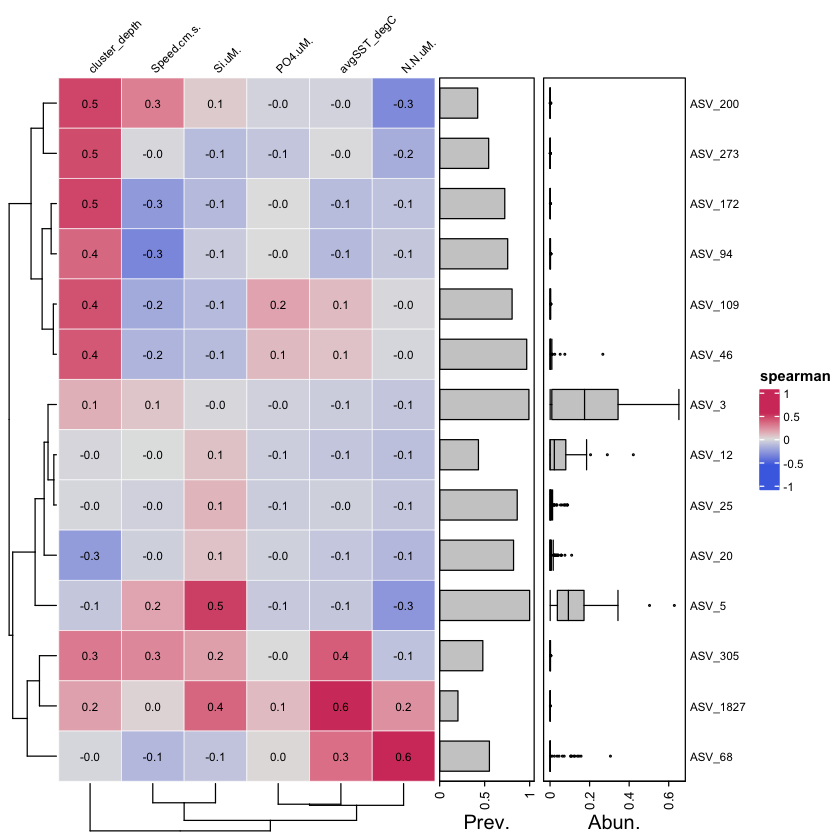

In [191]:

# create a couple of numerical variables to use
psq <- ps_ra_ad

psq <- tax_filter(psq, min_prevalence = 1 / 10, min_sample_abundance = 1 / 10)
#Proportional min_prevalence given: 0.1 --> min 23/222 samples.
#psq <- psq %>% tax_fix() #%>% tax_agg(rank = "genus")

# randomly select 20 taxa from the 50 most abundant taxa
set.seed(123)
taxa <- sample(tax_top(psq, n = 50), size = 20)

# NOTE: detection threshold set to 50 as HITchip example data seems to have background noise
ud <- 50


# make simple correlation heatmap with all numeric-like variables
cor_heatmap(
  data = psq, taxa = GoodTaxa, cor = "spearman"
  #tax_anno = taxAnnotation(
    #Prv. = anno_tax_prev(undetected = ud),
   # Abd. = anno_tax_box(undetected = ud)
  )


In [263]:
?cor_heatmap

cor_heatmap {microViz},R Documentation
data,phyloseq or phyloseq extra
taxa,"list of taxa to include, or NA for all"
tax_anno,NULL or annotation function for taxa: taxAnnotation() output.
taxon_renamer,function to rename taxa before plotting
vars,selection of variable names from sample_data
var_anno,NULL or annotation function for variables: varAnnotation() output.
cor,"correlation coefficient. pearson/kendall/spearman, can be abbreviated (used as legend title)"
cor_use,passed to cor(use = cor_use)
colors,output of heat_palette() to set heatmap fill color scheme
numbers,output of heat_numbers() to draw numbers on heatmap cells
